In [2]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from math import * 
from statistics import *
from collections import *
from itertools import *

In [8]:
df=pd.read_csv('AC_Data_Cleaned.csv')

In [9]:
df['Merged']=df['Brands']+' '+df['Ton'].astype(str)+' '+'Ton'+' '+df['Star'].astype(str)+' '+'Star'

In [10]:
df=df.drop(columns=['Unnamed: 0'])

In [11]:
Product_Warranty=[]
PCB_Warranty=[]
Compressor_Warranty=[]
Condenser_Warranty=[]
ODU_Casing_Warranty=[]
for i in df['Warranty']:
    Product_Warranty.append(re.findall('^\d',str(i))[0])
    Compressor_Warranty.append(re.findall('(\d{1,2})\s*[yearYEARSs]{4,5}\s*\w*\s*Compressor',str(i)) if re.search('(\d{1,2})\s*[yearYEARSs]{4,5}\s*\w*\s*Compressor',str(i)) else np.nan)
    PCB_Warranty.append(re.findall('(\d{1,2})\s*[yearYEARSs]{4,5}\s*\w*\s*(ODU PCB|Controller/|PCB)',str(i)) if re.search('(\d{1,2})\s*[yearYEARSs]{4,5}\s*\w*\s*(ODU PCB|Controller/|PCB)',str(i)) else np.nan)
    Condenser_Warranty.append(re.findall('(\d{1,2})\s*[yearYEARSs]{4,5}\s*\w*\s*\w*\s*(Condenser|Coils)',str(i)) if re.search('(\d{1,2})\s*[yearYEARSs]{4,5}\s*\w*\s*\w*\s*(Condenser|Coils)',str(i)) else np.nan)  
    ODU_Casing_Warranty.append(re.findall('(\d{1,2})\s*[yearYEARSs]{4,5}\s*\w*\s*\w*\s*ODU Casing',str(i)) if re.search('(\d{1,2})\s*[yearYEARSs]{4,5}\s*\w*\s*\w*\s*ODU Casing',str(i)) else np.nan)    
warranty={'Product_Warranty(Years)':Product_Warranty,'PCB_Warranty(Years)':PCB_Warranty,'Compressor_Warranty(Years)':Compressor_Warranty,'Condenser_Warranty(Years)':Condenser_Warranty,'ODU_Casing_Warranty(Years)':ODU_Casing_Warranty}
df2=pd.DataFrame(warranty)

In [12]:
df2['Product_Warranty(Years)']=df2['Product_Warranty(Years)'].astype(int)

In [13]:
df2['Compressor_Warranty(Years)']=df2['Compressor_Warranty(Years)'].astype(str).replace(to_replace='[\[\]\s]',value='',regex=True)
com=[]
for i in df2['Compressor_Warranty(Years)']:
            com.append(int(re.findall('\d+',i)[0]) if re.search('\d',i) else np.nan)
df2['Compressor_Warranty(Years)']=com
df2['Compressor_Warranty(Years)'].fillna(1,inplace=True)
df2['Compressor_Warranty(Years)']=df2['Compressor_Warranty(Years)'].astype(int)

In [14]:
df2['PCB_Warranty(Years)']=df2['PCB_Warranty(Years)'].astype(str).replace(to_replace='[\[\]\(\)\D]',value='',regex=True)
pcb=[]
for i in df2['PCB_Warranty(Years)']:
    pcb.append(re.findall('\d+',i)[0] if re.search('\d',i) else np.nan)
df2['PCB_Warranty(Years)']=pcb
df2['PCB_Warranty(Years)'].fillna(1,inplace=True)
df2['PCB_Warranty(Years)']=df2['PCB_Warranty(Years)'].astype(int)

In [15]:
df2['Condenser_Warranty(Years)']=df2['Condenser_Warranty(Years)'].astype(str).replace(to_replace='[\[\]\(\)\D]',value='',regex=True)
cond=[]
for i in df2['Condenser_Warranty(Years)']:
    cond.append(re.findall('\d+',i)[0] if re.search('\d',i) else np.nan)
df2['Condenser_Warranty(Years)']=cond
df2['Condenser_Warranty(Years)'].fillna(1,inplace=True)
df2['Condenser_Warranty(Years)']=df2['Condenser_Warranty(Years)'].astype(int)

In [16]:
df2['ODU_Casing_Warranty(Years)']=df2['ODU_Casing_Warranty(Years)'].astype(str).replace(to_replace='[\[\]\(\)\D]',value='',regex=True)
odu=[]
for i in df2['ODU_Casing_Warranty(Years)']:
    odu.append(re.findall('\d+',i)[0] if re.search('\d',i) else np.nan)
df2['ODU_Casing_Warranty(Years)']=odu
df2['ODU_Casing_Warranty(Years)'].fillna(1,inplace=True)
df2['ODU_Casing_Warranty(Years)']=df2['ODU_Casing_Warranty(Years)'].astype(int)

In [17]:
df3=pd.concat([df,df2],axis=1)

In [18]:
df3.columns

Index(['Brands', 'Ton', 'Star', 'Type', 'Color', 'Condenser_Coil', 'Noise(dB)',
       'Power_Consumption(kWh)', 'Refrigerant', 'Wi_Fi Enabled', 'Warranty',
       'Ratings_Count', 'Reviews_Count', 'Avg_star', 'Offer_Price(₹)',
       'Actual_Price(₹)', 'Offer_Price_Range(₹)', 'Act_Price_Range(₹)',
       'Power_Range(kWh)', 'Merged', 'Product_Warranty(Years)',
       'PCB_Warranty(Years)', 'Compressor_Warranty(Years)',
       'Condenser_Warranty(Years)', 'ODU_Casing_Warranty(Years)'],
      dtype='object')

In [19]:
df3['Discount(%)']=(1-(df3['Offer_Price(₹)']/df3['Actual_Price(₹)']))*100
df3['Discount(%)']=df3['Discount(%)'].round()

In [20]:
df3['Star']=df3['Star'].astype(int)

In [21]:
df3['Avg_star_Range']=pd.cut(df3['Avg_star'],[x for x in np.arange(-0.5,5.1,0.5)],labels=['(-0.5,0.0]','(0.0,0.5]','(0.5,1.0]','(1.0,1.5]',
 '(1.5,2.0]','(2.0,2.5]','(2.5,3.0]','(3.0,3.5]','(3.5,4.0]','(4.0,4.5]','(4.5,5.0]'])

In [22]:
df3['Noise(dB)'].max()

62.0

In [23]:
df3['Noise(dB)_Range']=pd.cut(df3['Noise(dB)'],[x for x in np.arange(20,66,5)],labels=['(20, 25]','(25, 30]','(30, 35]','(35, 40]','(40, 45]','(45, 50]','(50, 55]','(55, 60]','(60, 65]'])

In [24]:
df3.head()

,Brands,Ton,Star,Type,Color,Condenser_Coil,Noise(dB),Power_Consumption(kWh),Refrigerant,Wi_Fi Enabled,...,Power_Range(kWh),Merged,Product_Warranty(Years),PCB_Warranty(Years),Compressor_Warranty(Years),Condenser_Warranty(Years),ODU_Casing_Warranty(Years),Discount(%),Avg_star_Range,Noise(dB)_Range
0,Voltas,1.5,4,Split Inverter,White,Copper,46.0,2432.0,R32,No,...,"(2000,2500]",Voltas 1.5 Ton 4.0 Star,1,1,5,1,1,50.0,"(3.5,4.0]","(45, 50]"
1,Whirlpool,1.5,5,Split Inverter,White,Copper,35.0,2120.0,R32,No,...,"(2000,2500]",Whirlpool 1.5 Ton 5.0 Star,1,1,1,1,1,51.0,"(4.0,4.5]","(30, 35]"
2,Hitachi,1.5,3,Split Inverter,"White, Gold",Copper,36.0,1098.0,R32A,No,...,"(1000,1500]",Hitachi 1.5 Ton 3.0 Star,1,1,10,1,1,40.0,"(3.5,4.0]","(35, 40]"
3,Blue Star,1.0,3,Portable,"White, Grey",Copper,52.0,2245.0,R410A,No,...,"(2000,2500]",Blue Star 1.0 Ton 3.0 Star,1,1,1,1,1,9.0,"(3.5,4.0]","(50, 55]"
4,Onida,1.5,3,Split Inverter,White,Copper,52.0,2784.0,R32A,No,...,"(2500,3000]",Onida 1.5 Ton 3.0 Star,1,1,5,1,1,44.0,"(4.0,4.5]","(50, 55]"


In [25]:
DF=df3[['Brands', 'Ton', 'Star', 'Type', 'Color', 'Condenser_Coil', 'Noise(dB)','Noise(dB)_Range',
       'Power_Consumption(kWh)','Power_Range(kWh)','Refrigerant', 'Wi_Fi Enabled', 'Product_Warranty(Years)', 'PCB_Warranty(Years)',
       'Compressor_Warranty(Years)', 'Condenser_Warranty(Years)', 'ODU_Casing_Warranty(Years)','Ratings_Count', 'Reviews_Count', 
        'Avg_star','Avg_star_Range', 'Offer_Price(₹)','Offer_Price_Range(₹)','Actual_Price(₹)','Act_Price_Range(₹)','Discount(%)','Merged']]

In [26]:
types=[]
for i in DF["Type"]:
    if 'Split' in i:
        types.append('Split')
    elif 'Window' in i:
        types.append('Window')
    elif 'Portable' in i:
        types.append('Portable')
    else:
        types.append('Tower')
DF['Types']=types

In [21]:
# DF.to_csv('Flipkart AC EDA.csv')

In [208]:
# DF.to_excel('E:\KIRAN\INNOMATICS\Flipkart AC EDA.xlsx')

In [20]:
df5=DF[((DF['Avg_star_Range']=='(4.5,5.0]')&(DF['Offer_Price_Range(₹)']=='(40000,45000]'))].groupby(['Brands','Ton','Star','Type','Avg_star','Offer_Price(₹)']).size().reset_index().rename(columns={0:'Available'})
df5=df5[df5['Available']!=0]
df5=df5.reset_index(drop=True)
df5

,Brands,Ton,Star,Type,Avg_star,Offer_Price(₹),Available
0,Blue Star,1.5,5,Split Inverter,4.6,42790.0,1
1,Blue Star,1.5,5,Split Inverter,4.6,43950.0,1
2,Lg,1.5,3,Split Dual Inverter,4.9,44000.0,1
3,Samsung,1.0,3,Split Inverter,4.8,41000.0,1
4,Samsung,1.0,5,Split Inverter,4.8,43599.0,1
5,Samsung,1.5,5,Split Inverter,4.7,42475.0,1


<Figure size 1080x1080 with 0 Axes>

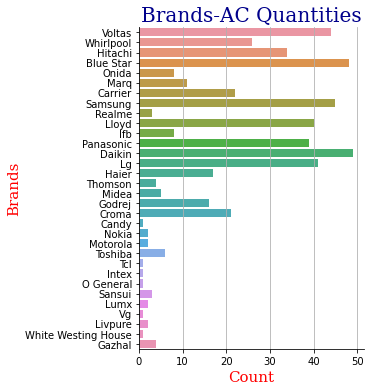

In [21]:
plt.figure(figsize=(15,15))
sns.catplot(y='Brands',kind='count',data=DF)
font2 = {'family':'serif','color':'darkblue','size':20}
plt.title('Brands-AC Quantities',fontdict=font2)
font1= {'family':'serif','color':'red','size':15}
plt.xlabel('Count',fontdict=font1)
plt.ylabel('Brands',fontdict=font1)
plt.grid(axis='x')
plt.show()

# Observations:-
#Blue Star & Panasonic are leading producers of ACs in Indian Market

<ipython-input-22-a8844683096f>:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.xticks(Rotation=90);


Text(0.5, 1.0, 'Brands vs Mean Offer Price(₹)')

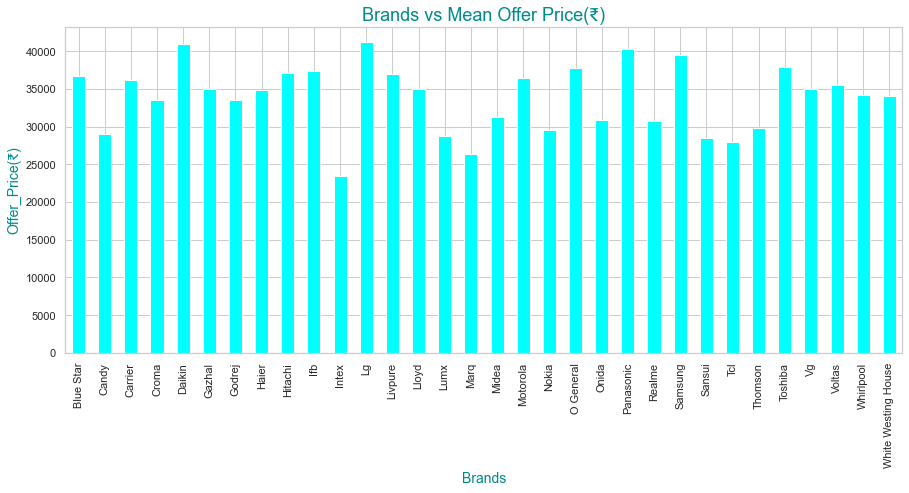

In [22]:
plt.figure(figsize=(15,6))
sns.set(style='whitegrid')
DF.groupby('Brands')['Offer_Price(₹)'].mean().plot.bar(color='cyan')
plt.xticks(Rotation=90);
plt.xlabel('Brands',fontsize=14,color='darkcyan')
plt.ylabel('Offer_Price(₹)',fontsize=14,color='darkcyan')
plt.title('Brands vs Mean Offer Price(₹)',fontsize=18,color='darkcyan')

Observation:
O General ACs are slightly costlier.

C:\Users\Bharath Kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


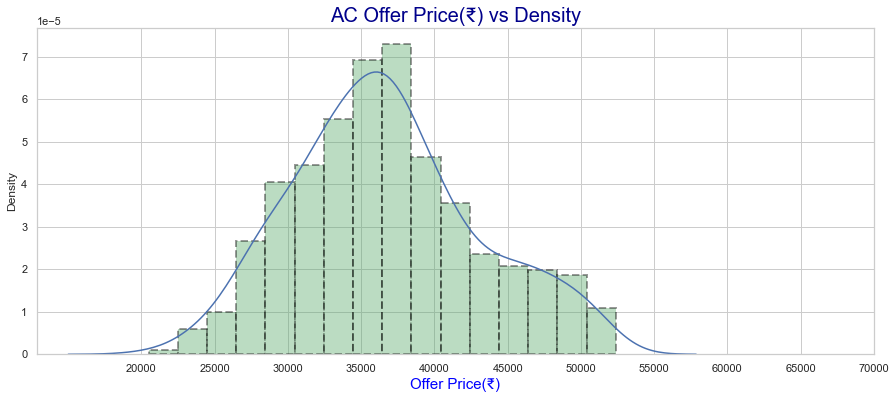

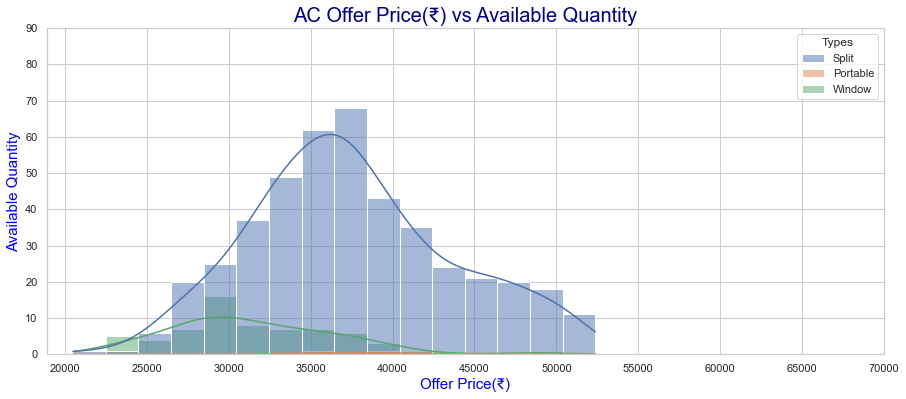

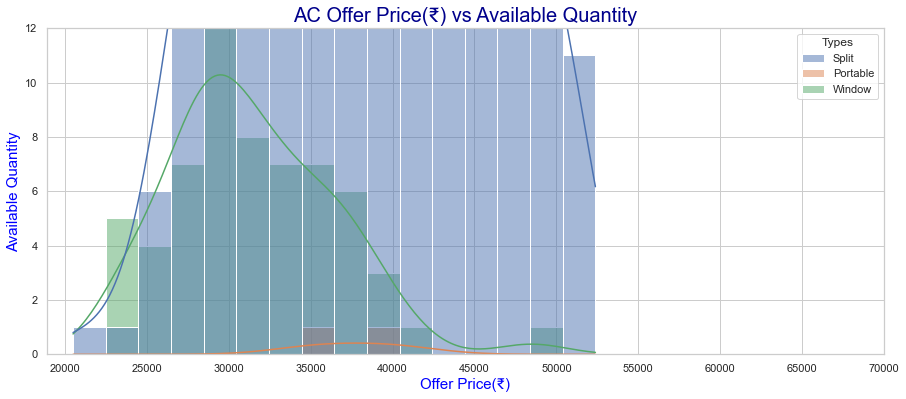

In [23]:
# Histogram to show the availability of ACs in price ranges
plt.figure(figsize=(15,6))
sns.distplot(x = DF['Offer_Price(₹)'], kde = True,hist_kws={'color':'g', 'edgecolor':'black',
                       'linewidth':2, 'linestyle':'--'})
plt.title('AC Offer Price(₹) vs Density',fontsize=20,color='darkblue')
plt.xlabel('Offer Price(₹)',fontsize=15,color='blue')
plt.xticks(range(20000,71000,5000))
plt.show()
plt.figure(figsize=(15,6))
# plt.hist(DF['Offer_Price(₹)'],color='cornflowerblue')
sns.histplot(data = DF, x = 'Offer_Price(₹)', kde = True, hue = "Types")
plt.title('AC Offer Price(₹) vs Available Quantity',fontsize=20,color='darkblue')
plt.xlabel('Offer Price(₹)',fontsize=15,color='blue')
plt.ylabel('Available Quantity',fontsize=15,color='blue')
plt.xticks(range(20000,71000,5000))
plt.yticks(np.arange(0,100,10))#to scale the axis as per reqirement
plt.show()
plt.figure(figsize=(15,6))
# plt.hist(DF['Offer_Price(₹)'],color='cornflowerblue')
sns.histplot(data = DF, x = 'Offer_Price(₹)', kde = True, hue = "Types")
plt.ylim([0,12])
plt.xticks(range(20000,71000,5000))
plt.title('AC Offer Price(₹) vs Available Quantity',fontsize=20,color='darkblue')
plt.xlabel('Offer Price(₹)',fontsize=15,color='blue')
plt.ylabel('Available Quantity',fontsize=15,color='blue')
plt.show()

In [24]:
# Observation
# Tower Ac is costliest
# Most of the Split Acs are is price range between ₹ 35000 -₹ 40000
# Most of the Window Acs are is price range between ₹ 30000 -₹ 35000


<ipython-input-25-afc4c0f1f4e4>:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.xticks(Rotation=90);


Text(0.5, 1.0, 'AC Prices vs Available Quantities')

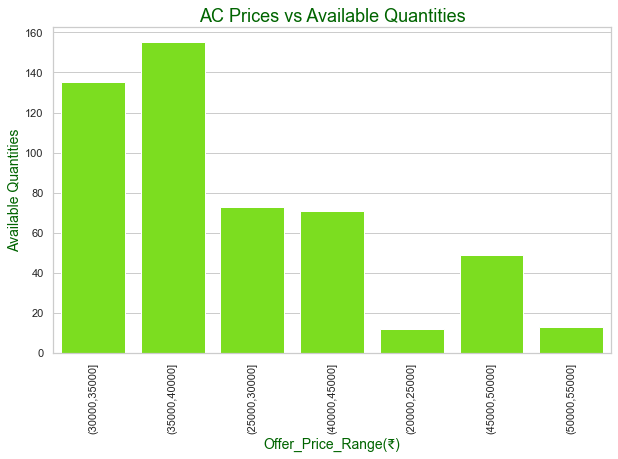

In [25]:
# DF['Price_Range(₹)'].value_counts(normalize=True).plot(kind='bar')
plt.figure(figsize=(10,6))
sns.set(style='whitegrid')
sns.countplot(x='Offer_Price_Range(₹)',data=DF,color='lawngreen')
plt.xticks(Rotation=90);
plt.xlabel('Offer_Price_Range(₹)',fontsize=14,color='darkgreen')
plt.ylabel('Available Quantities',fontsize=14,color='darkgreen')
plt.title('AC Prices vs Available Quantities',fontsize=18,color='darkgreen')

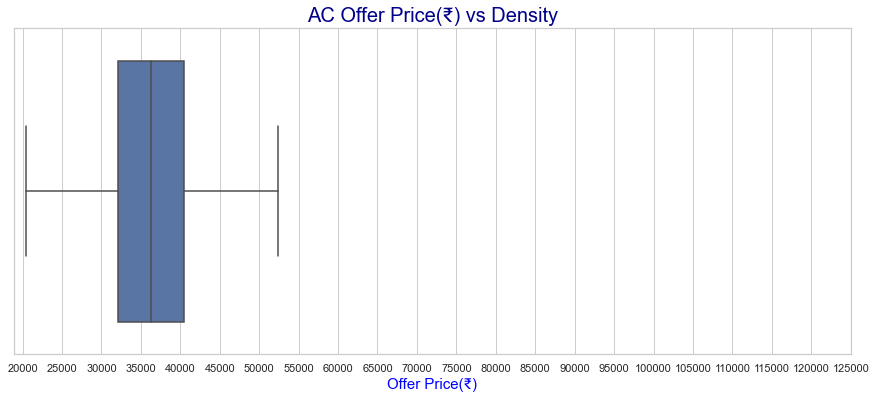

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

In [26]:
# Histogram to show the availability of ACs in price ranges
plt.figure(figsize=(15,6))
sns.boxplot(x = DF['Offer_Price(₹)'])
plt.title('AC Offer Price(₹) vs Density',fontsize=20,color='darkblue')
plt.xlabel('Offer Price(₹)',fontsize=15,color='blue')
plt.xticks(range(20000,130000,5000))
plt.show()
plt.figure(figsize=(15,6))

(array([0, 1, 2]),
 [Text(0, 0, 'Split'), Text(1, 0, 'Portable'), Text(2, 0, 'Window')])

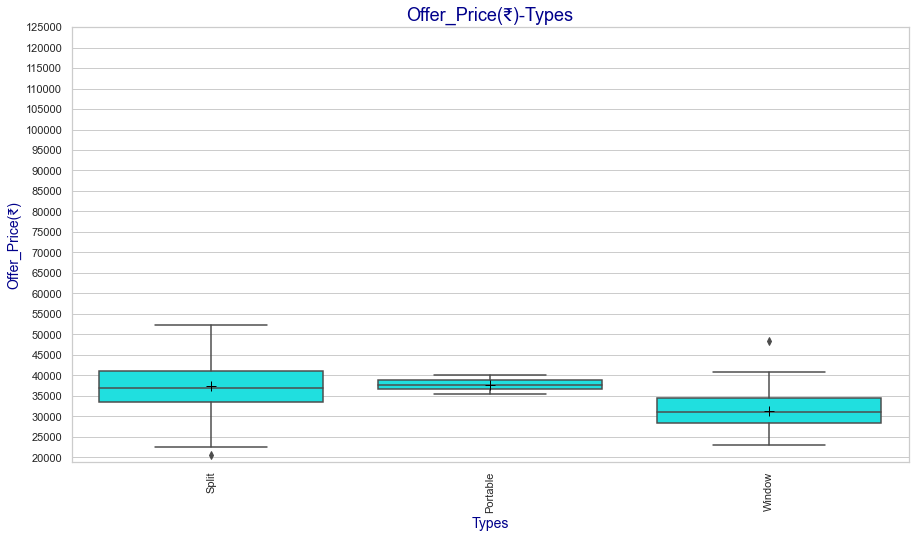

In [27]:
plt.figure(figsize=(15,8))
sns.boxplot(y=DF['Offer_Price(₹)'],color='cyan',x=DF['Types'],showmeans=True,meanprops={"marker": "+","markeredgecolor": "black",
                       "markersize": "10"})
plt.ylabel('Offer_Price(₹)',fontsize=14,color='darkblue')
plt.xlabel('Types',fontsize=14,color='darkblue')
plt.title('Offer_Price(₹)-Types',fontsize=18,color='darkblue')
plt.yticks(range(20000,130000,5000));
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Split Inverter'),
  Text(1, 0, 'Portable'),
  Text(2, 0, 'Split'),
  Text(3, 0, 'Window'),
  Text(4, 0, 'Split Dual Inverter'),
  Text(5, 0, 'Split Inverter Smart'),
  Text(6, 0, 'Split Triple Inverter'),
  Text(7, 0, 'Window Dual Inverter'),
  Text(8, 0, 'Window Inverter'),
  Text(9, 0, 'Split Expandable'),
  Text(10, 0, 'Split Dual Inverter Smart'),
  Text(11, 0, 'Split Triple Inverter Smart')])

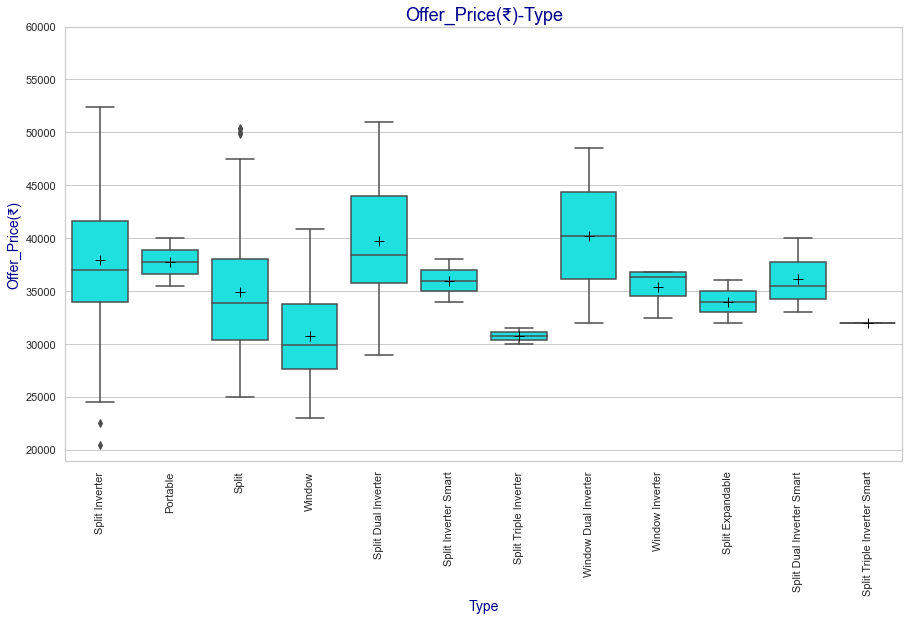

In [28]:
plt.figure(figsize=(15,8))
sns.boxplot(y=DF['Offer_Price(₹)'],color='cyan',x=DF['Type'],showmeans=True,meanprops={"marker": "+","markeredgecolor": "black",
                       "markersize": "10"})
plt.ylabel('Offer_Price(₹)',fontsize=14,color='darkblue')
plt.xlabel('Type',fontsize=14,color='darkblue')
plt.title('Offer_Price(₹)-Type',fontsize=18,color='darkblue')
plt.yticks(range(20000,61000,5000));
plt.xticks(rotation=90)

Observation:
    Split AC price range is between 22000 to 57000
    Portable AC price range is between 36000 to 40000
    Window AC price range is between 24000 to 42000
    Tower AC price is around 125000.

<ipython-input-29-fa935f5af4d0>:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.xticks(Rotation=90);


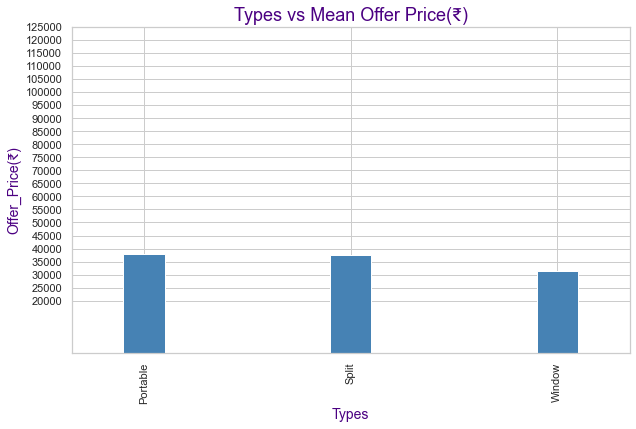

In [29]:
plt.figure(figsize=(10,6))
DF.groupby('Types')['Offer_Price(₹)'].mean().plot(kind='bar',color='steelblue',width=0.2)
plt.xticks(Rotation=90);
plt.xlabel('Types',fontsize=14,color='Indigo')
plt.ylabel('Offer_Price(₹)',fontsize=14,color='Indigo')
plt.title('Types vs Mean Offer Price(₹)',fontsize=18,color='Indigo')
plt.yticks(range(20000,130000,5000));

<ipython-input-30-dc150dd25bf3>:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.xticks(Rotation=90);


Text(0.5, 1.0, 'Type vs Mean Offer Price(₹)')

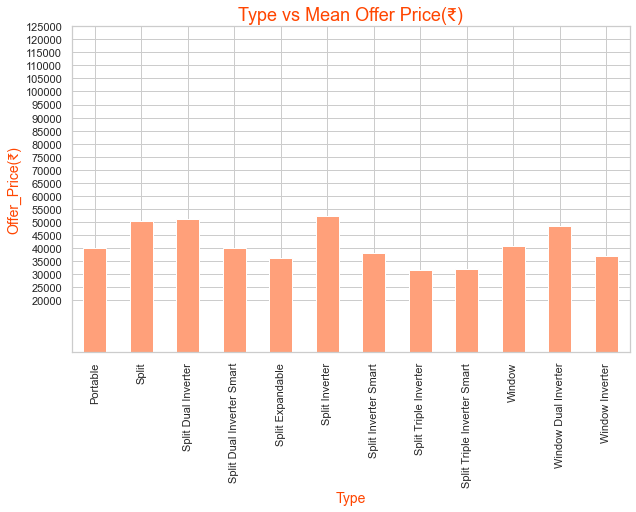

In [30]:
plt.figure(figsize=(10,6))
DF.groupby('Type')['Offer_Price(₹)'].max().plot(kind='bar',color='lightsalmon')
plt.xticks(Rotation=90);
plt.yticks(range(20000,130000,5000));
plt.xlabel('Type',fontsize=14,color='orangered')
plt.ylabel('Offer_Price(₹)',fontsize=14,color='orangered')
plt.title('Type vs Mean Offer Price(₹)',fontsize=18,color='orangered')

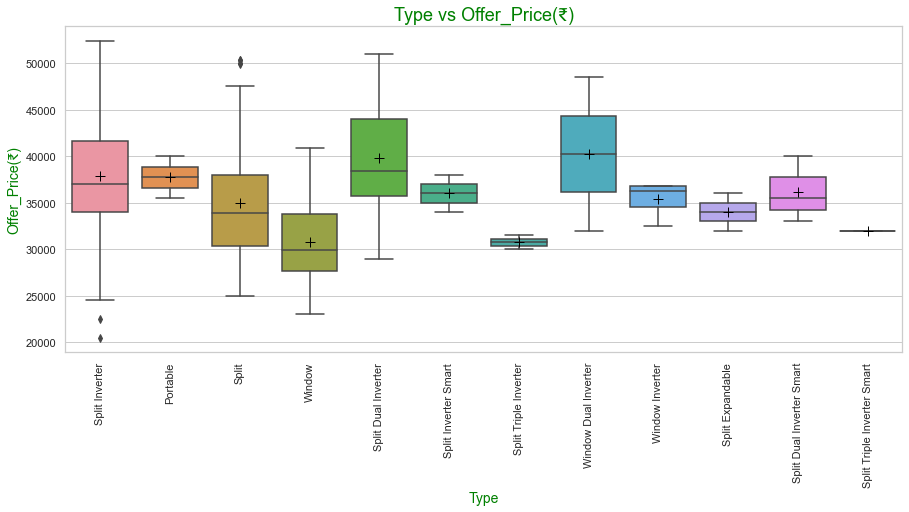

In [31]:
plt.figure(figsize=(15,6))
sns.boxplot(x='Type',y='Offer_Price(₹)',data=DF,showmeans=True,meanprops={"marker": "+","markeredgecolor": "black",
                       "markersize": "10"})
plt.ylabel('Offer_Price(₹)',fontsize=14,color='green')
plt.xlabel('Type',fontsize=14,color='green')
plt.title('Type vs Offer_Price(₹)',fontsize=18,color='green')
plt.xticks(rotation=90);

Text(0.5, 1.0, 'Star Rating')

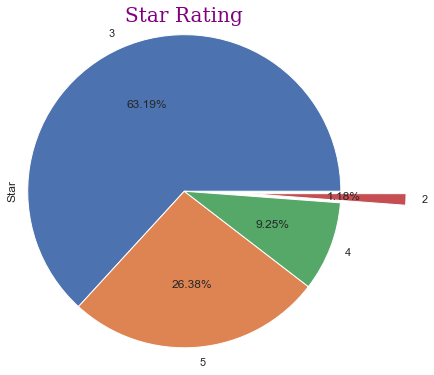

In [32]:
plt.figure(figsize=(6,6))
DF['Star'].value_counts(normalize=True).plot(kind='pie',autopct="%.2f%%",radius=1.2,explode=[0,0,0,0.5])
font2 = {'family':'serif','color':'purple','size':20}
plt.title('Star Rating',fontdict=font2)

Text(0.5, 1.0, 'Condenser_Coil')

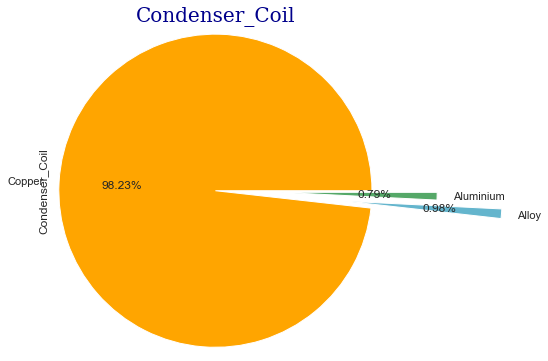

In [33]:
plt.figure(figsize=(6,6))
DF['Condenser_Coil'].value_counts(normalize=True).plot(kind='pie',colors=["orange", 'c','g'],autopct="%.2f%%",radius=1.2,explode=[0,1,0.5])
font2 = {'family':'serif','color':'darkblue','size':20}
plt.title('Condenser_Coil',fontdict=font2)

In [34]:
# Observations:
#     3 Star Energy Rating ACs are widely available in market followed by 5 Star Energy Rating ACs

<ipython-input-35-0d57768949d2>:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.xticks(Rotation=0);


Text(0.5, 1.0, 'Star vs Mean Offer Price(₹)')

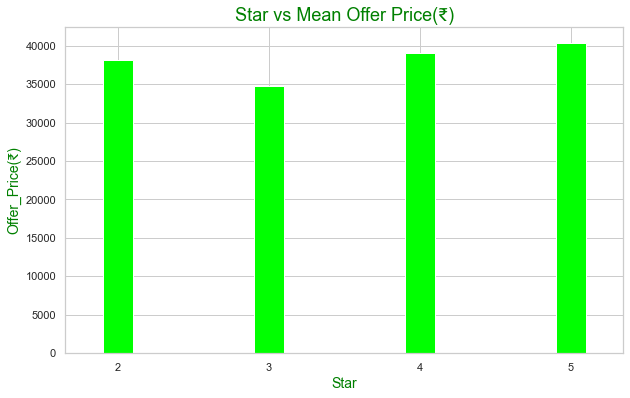

In [35]:
plt.figure(figsize=(10,6))
DF.groupby('Star')['Offer_Price(₹)'].mean().plot(kind='bar',color='lime',width=0.2)#'darkgoldenrod')
plt.xticks(Rotation=0);
plt.xlabel('Star',fontsize=14,color='green')
plt.ylabel('Offer_Price(₹)',fontsize=14,color='green')
plt.title('Star vs Mean Offer Price(₹)',fontsize=18,color='green')

In [36]:
# Observations
# 5 Star ACs are costliest


Text(0.5, 1.0, 'Star vs Offer_Price(₹)')

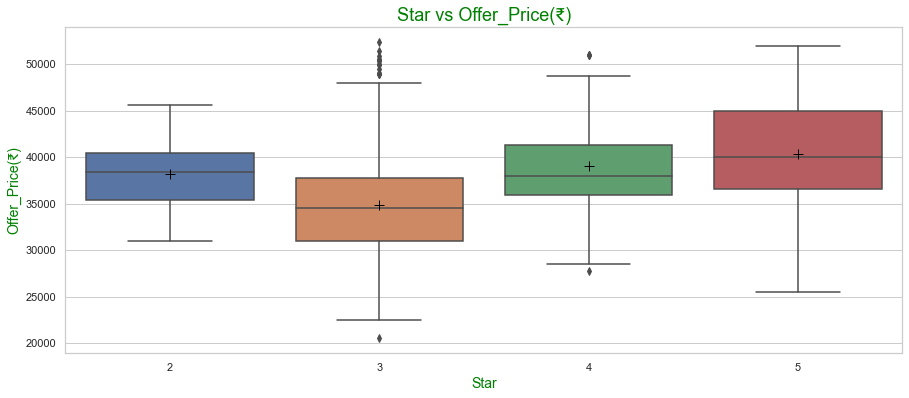

In [37]:
plt.figure(figsize=(15,6))
sns.boxplot(x='Star',y='Offer_Price(₹)',data=DF,showmeans=True,meanprops={"marker": "+","markeredgecolor": "black",
                       "markersize": "10"})
plt.ylabel('Offer_Price(₹)',fontsize=14,color='green')
plt.xlabel('Star',fontsize=14,color='green')
plt.title('Star vs Offer_Price(₹)',fontsize=18,color='green')

<ipython-input-38-1ac7c68668a9>:8: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.xticks(Rotation=0);
<ipython-input-38-1ac7c68668a9>:16: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.xticks(Rotation=0);


Text(0.5, 1.0, 'Ton vs Available (%)')

<Figure size 432x432 with 0 Axes>

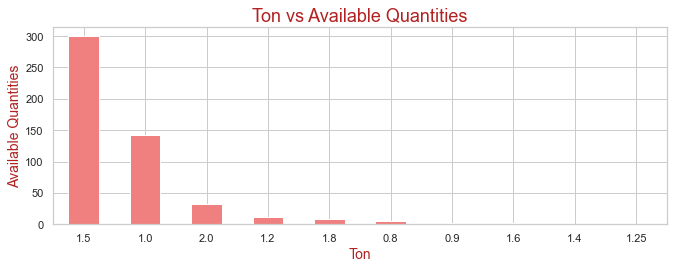

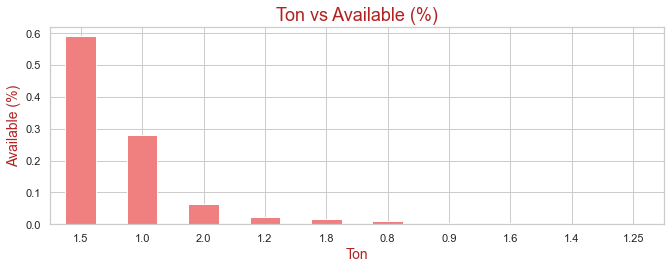

In [38]:
plt.figure(figsize=(6,6))
# DF['Ton'].value_counts().plot.bar()
sns.set(style='whitegrid')
#sns.countplot(x='Ton',data=DF,color='lightpink')
plt.figure(figsize=(11,8))
plt.subplot(2,1,1)
DF['Ton'].value_counts().plot.bar(color='lightcoral');
plt.xticks(Rotation=0);
plt.xlabel('Ton',fontsize=14,color='firebrick')
plt.ylabel('Available Quantities',fontsize=14,color='firebrick')
plt.title('Ton vs Available Quantities',fontsize=18,color='firebrick')

plt.figure(figsize=(11,8))
plt.subplot(2,1,2)
DF['Ton'].value_counts(normalize=True).plot.bar(color='lightcoral');
plt.xticks(Rotation=0);
plt.xlabel('Ton',fontsize=14,color='firebrick')
plt.ylabel('Available (%)',fontsize=14,color='firebrick')
plt.title('Ton vs Available (%)',fontsize=18,color='firebrick')

In [39]:
# Observation:
#     1.5 Ton ACs avaiability is more.

<ipython-input-40-863ba17ebb05>:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.xticks(Rotation=0);


Text(0.5, 1.0, 'Ton vs Mean Offer Price(₹)')

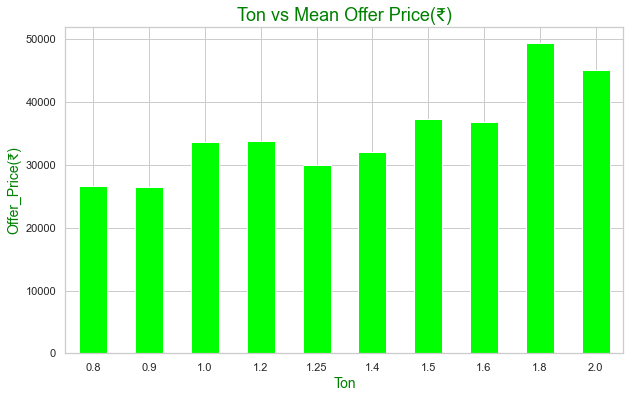

In [40]:
plt.figure(figsize=(10,6))
DF.groupby('Ton')['Offer_Price(₹)'].mean().plot(kind='bar',color='lime')#'darkgoldenrod')
plt.xticks(Rotation=0);
plt.xlabel('Ton',fontsize=14,color='green')
plt.ylabel('Offer_Price(₹)',fontsize=14,color='green')
plt.title('Ton vs Mean Offer Price(₹)',fontsize=18,color='green')

Text(0.5, 1.0, 'Ton vs Offer_Price(₹)')

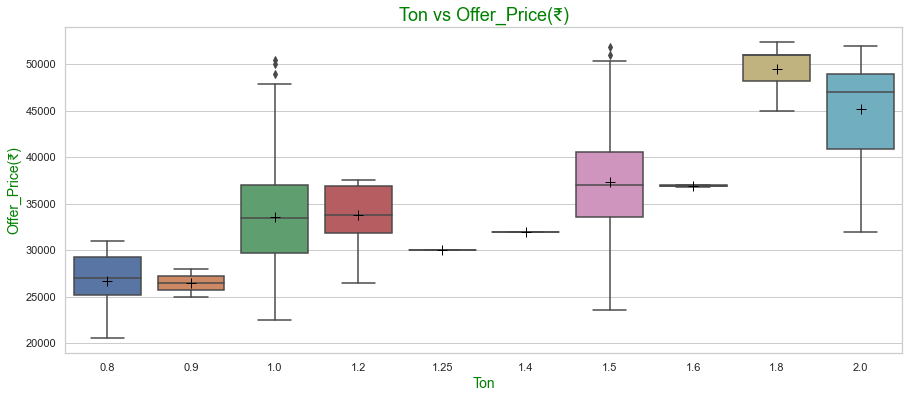

In [41]:
plt.figure(figsize=(15,6))
sns.boxplot(x='Ton',y='Offer_Price(₹)',data=DF,showmeans=True,meanprops={"marker": "+","markeredgecolor": "black",
                       "markersize": "10"})
plt.ylabel('Offer_Price(₹)',fontsize=14,color='green')
plt.xlabel('Ton',fontsize=14,color='green')
plt.title('Ton vs Offer_Price(₹)',fontsize=18,color='green')

In [42]:
DF.columns

Index(['Brands', 'Ton', 'Star', 'Type', 'Color', 'Condenser_Coil', 'Noise(dB)',
       'Power_Consumption(kWh)', 'Power_Range(kWh)', 'Refrigerant',
       'Wi_Fi Enabled', 'Product_Warranty(Years)', 'PCB_Warranty(Years)',
       'Compressor_Warranty(Years)', 'Condenser_Warranty(Years)',
       'ODU_Casing_Warranty(Years)', 'Ratings_Count', 'Reviews_Count',
       'Avg_star', 'Avg_star_Range', 'Offer_Price(₹)', 'Offer_Price_Range(₹)',
       'Actual_Price(₹)', 'Act_Price_Range(₹)', 'Discount(%)', 'Merged',
       'Types'],
      dtype='object')

Text(0.5, 1.0, 'Power_Consumption(kWh) vs Offer_Price(₹)')

<Figure size 1440x576 with 0 Axes>

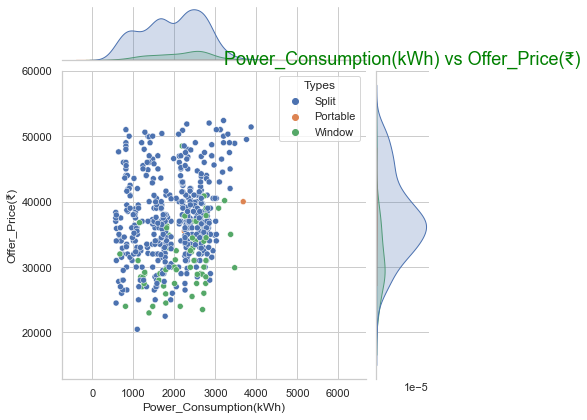

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
sns.jointplot(data=DF, x="Power_Consumption(kWh)", y="Offer_Price(₹)",  marker="o",hue='Types',alpha=1)
plt.ylabel('Offer_Price(₹)',fontsize=14,color='green')
plt.xlabel('Power_Consumption(kWh)',fontsize=14,color='green')
plt.title('Power_Consumption(kWh) vs Offer_Price(₹)',fontsize=18,color='green',loc='center')

In [44]:
DF[['Brands','Type']].value_counts().to_dict()

{('Daikin', 'Split Inverter'): 39,
 ('Samsung', 'Split Inverter'): 37,
 ('Lg', 'Split Dual Inverter'): 35,
 ('Panasonic', 'Split Inverter'): 32,
 ('Voltas', 'Split Inverter'): 28,
 ('Blue Star', 'Split Inverter'): 27,
 ('Whirlpool', 'Split Inverter'): 20,
 ('Lloyd', 'Split Inverter'): 19,
 ('Hitachi', 'Split Inverter'): 18,
 ('Godrej', 'Split Inverter'): 14,
 ('Haier', 'Split Inverter'): 13,
 ('Hitachi', 'Window'): 11,
 ('Croma', 'Split Inverter'): 11,
 ('Voltas', 'Split'): 11,
 ('Lloyd', 'Split'): 10,
 ('Carrier', 'Split Inverter'): 10,
 ('Blue Star', 'Window'): 10,
 ('Blue Star', 'Split'): 9,
 ('Lloyd', 'Window'): 9,
 ('Carrier', 'Window'): 9,
 ('Daikin', 'Split'): 8,
 ('Samsung', 'Split'): 7,
 ('Marq', 'Split Inverter'): 7,
 ('Croma', 'Window'): 6,
 ('Ifb', 'Split Inverter'): 6,
 ('Onida', 'Split Inverter'): 5,
 ('Voltas', 'Window'): 5,
 ('Panasonic', 'Split'): 5,
 ('Lg', 'Split Inverter'): 4,
 ('Whirlpool', 'Split'): 4,
 ('Toshiba', 'Split Inverter'): 4,
 ('Gazhal', 'Split Inverter

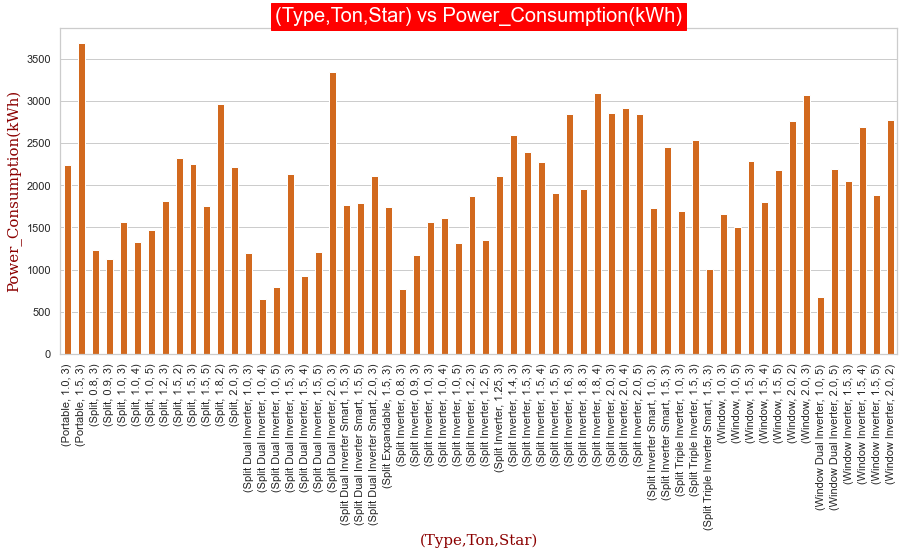

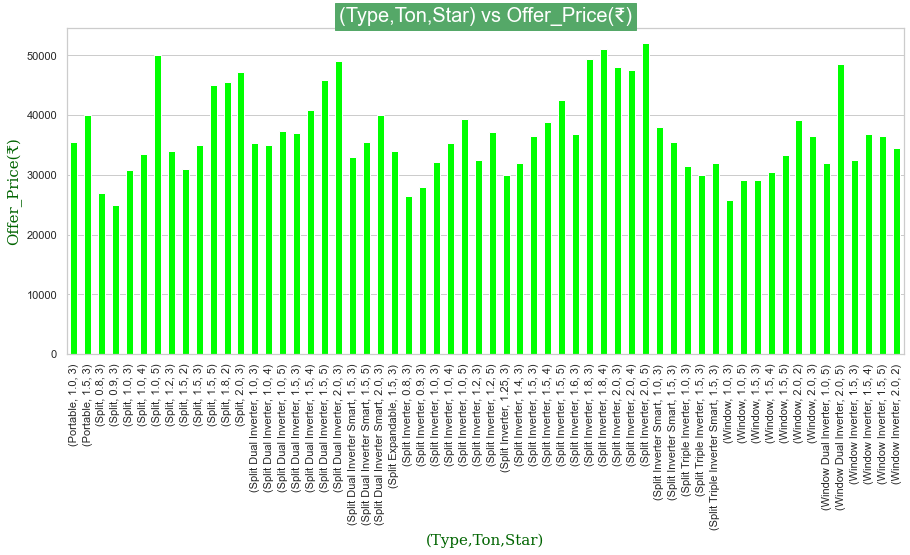

In [45]:
# plt.subplot(1,2,1)
# sns.set(style='whitegrid')
plt.figure(figsize=(15,6))
DF.groupby(['Type','Ton','Star'])['Power_Consumption(kWh)'].mean().plot.bar(color='chocolate');
font1 = {'family':'serif','color':'darkred','size':15}
plt.ylabel('Power_Consumption(kWh)',fontdict = font1)
plt.xlabel('(Type,Ton,Star)',fontdict = font1)
plt.xticks(rotation=90)
plt.title(label="(Type,Ton,Star) vs Power_Consumption(kWh)",fontsize=20,color='w',backgroundcolor='red')
plt.grid(axis = 'x',color = 'darkblue', linestyle = '--', linewidth = 1.0)
plt.show();
#plt.subplot(122)
# sns.set(style='whitegrid')
plt.figure(figsize=(15,6))
DF.groupby(['Type','Ton','Star'])['Offer_Price(₹)'].mean().plot(kind = 'bar',color='lime');
plt.xticks(rotation=90)
font2 = {'family':'serif','color':'darkgreen','size':15}
plt.ylabel('Offer_Price(₹)',fontdict = font2)
plt.xlabel('(Type,Ton,Star)',fontdict = font2)
plt.title(label="(Type,Ton,Star) vs Offer_Price(₹)",fontsize=20,color='w',backgroundcolor='g')
plt.grid(axis = 'x',color = 'darkblue', linestyle = '--', linewidth = 1.0)
plt.show();


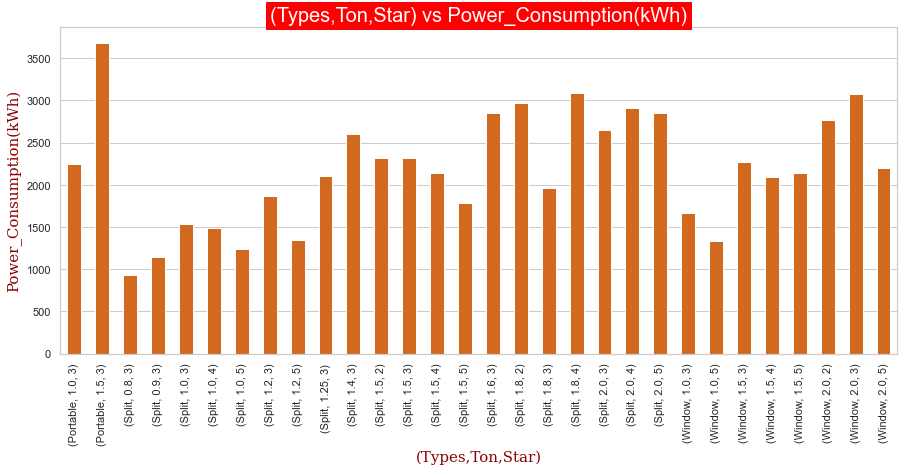

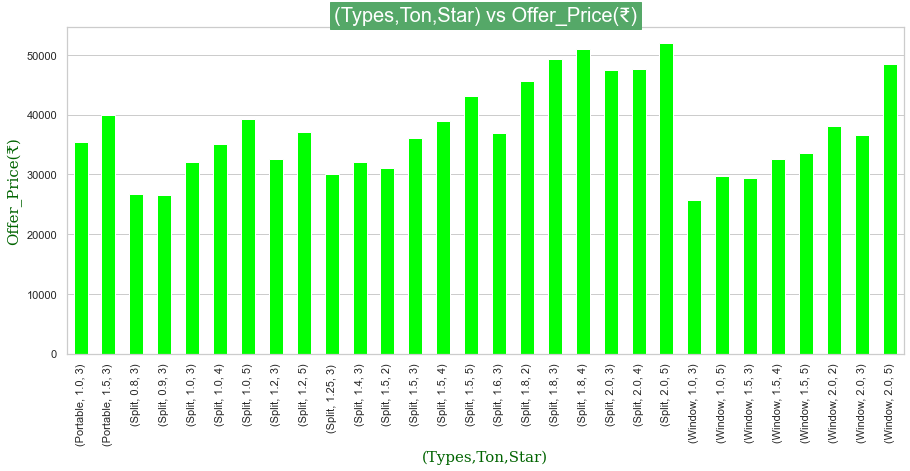

In [46]:
# plt.subplot(1,2,1)
# sns.set(style='whitegrid')
plt.figure(figsize=(15,6))
DF.groupby(['Types','Ton','Star'])['Power_Consumption(kWh)'].mean().plot.bar(color='chocolate');
font1 = {'family':'serif','color':'darkred','size':15}
plt.ylabel('Power_Consumption(kWh)',fontdict = font1)
plt.xlabel('(Types,Ton,Star)',fontdict = font1)
plt.xticks(rotation=90)
plt.title(label="(Types,Ton,Star) vs Power_Consumption(kWh)",fontsize=20,color='w',backgroundcolor='red')
plt.grid(axis = 'x',color = 'darkblue', linestyle = '--', linewidth = 1.0)
plt.show();
#plt.subplot(122)
# sns.set(style='whitegrid')
plt.figure(figsize=(15,6))
DF.groupby(['Types','Ton','Star'])['Offer_Price(₹)'].mean().plot(kind = 'bar',color='lime');
plt.xticks(rotation=90)
font2 = {'family':'serif','color':'darkgreen','size':15}
plt.ylabel('Offer_Price(₹)',fontdict = font2)
plt.xlabel('(Types,Ton,Star)',fontdict = font2)
plt.title(label="(Types,Ton,Star) vs Offer_Price(₹)",fontsize=20,color='w',backgroundcolor='g')
plt.grid(axis = 'x',color = 'darkblue', linestyle = '--', linewidth = 1.0)
plt.show();


Text(0.5, 1.0, 'Types')

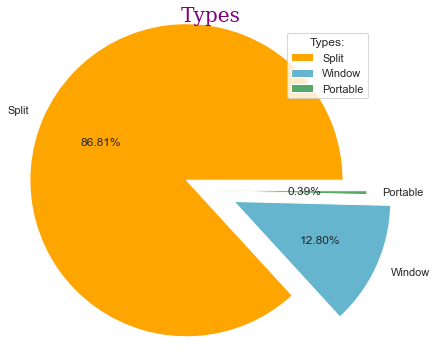

In [47]:
plt.figure(figsize=(6,6))
myexplode = [0.2, 0.2, 0]
t=DF['Types'].value_counts().plot.pie(autopct="%.2f%%",colors=["orange", 'c','g','r'],radius=1.2,explode = myexplode);
plt.legend(title='Types:')
font2 = {'family':'serif','color':'purple','size':20}
plt.title('Types',fontdict=font2)

Text(0.5, 1.0, 'Top 5 Types')

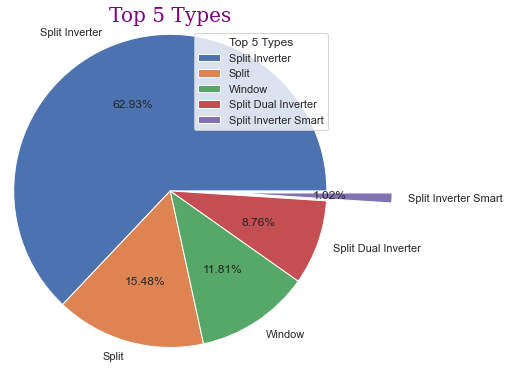

In [48]:
plt.figure(figsize=(6,6))
ac_types=DF['Type'].value_counts().index
ac_type_count=DF['Type'].value_counts().values
plt.pie(ac_type_count[:5],labels=ac_types[:5],autopct="%.2f%%",radius=1.2,explode=[0,0,0,0,0.5]);
plt.legend(title='Top 5 Types')
font2 = {'family':'serif','color':'purple','size':20}
plt.title('Top 5 Types',fontdict=font2)

C:\Users\Bharath Kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Bharath Kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


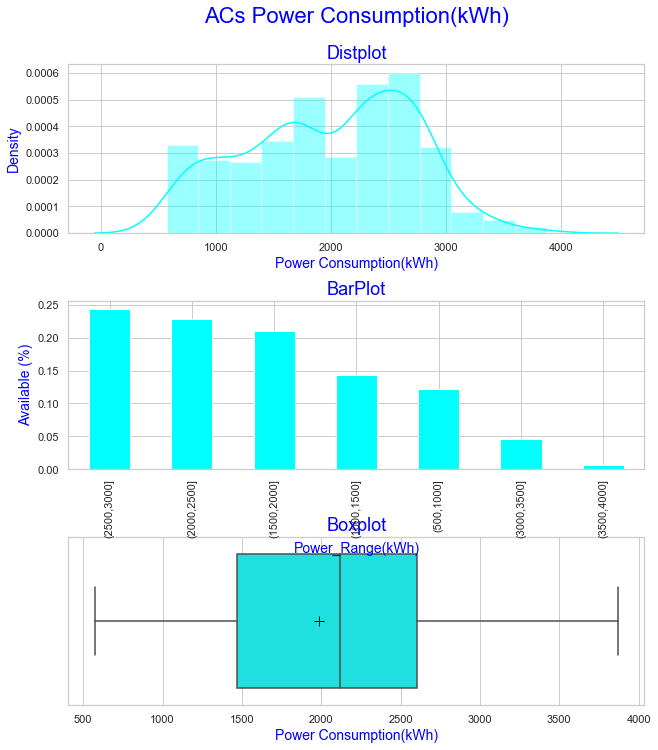

In [49]:
plt.figure(figsize=(10,10))

plt.subplot(3,1,1)
sns.distplot(DF['Power_Consumption(kWh)'],color='cyan')
plt.xlabel('Power Consumption(kWh)',fontsize=14,color='blue')
plt.ylabel('Density',fontsize=14,color='blue')
plt.title('Distplot',fontsize=18,color='blue')
plt.suptitle('ACs Power Consumption(kWh)',fontsize=22,color='blue')

plt.subplot(3,1,3)
sns.boxplot(DF['Power_Consumption(kWh)'],color='cyan',showmeans=True,meanprops={"marker": "+","markeredgecolor": "black",
                       "markersize": "10"})
plt.xlabel('Power Consumption(kWh)',fontsize=14,color='blue')
plt.title('Boxplot',fontsize=18,color='blue')

plt.subplot(3,1,2)
DF['Power_Range(kWh)'].value_counts(normalize=True).plot(kind='bar',color=['cyan'])
plt.xlabel('Power_Range(kWh)',fontsize=14,color='blue')
plt.ylabel('Available (%)',fontsize=14,color='blue')
plt.title('BarPlot',fontsize=18,color='blue')
# set the spacing between subplots
plt.subplots_adjust(left=0.1,bottom=0.01, right=0.9, top=0.9, wspace=0.4,hspace=0.4)

Text(0.5, 1.0, 'Power Consumption(kWh)-Types')

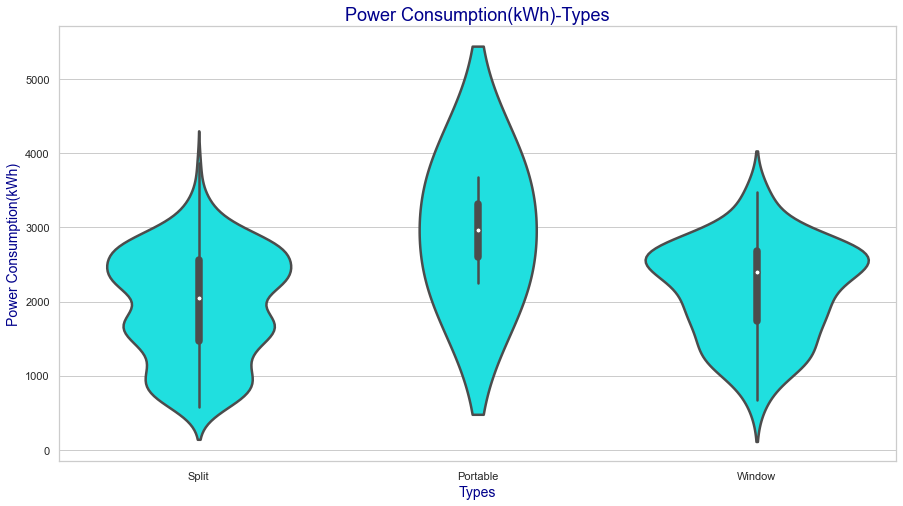

In [50]:
plt.figure(figsize=(15,8))
sns.violinplot(y=DF['Power_Consumption(kWh)'],color='cyan',x=DF['Types'],showmeans=True,meanprops={"marker": "+","markeredgecolor": "",
                       "markersize": "30"},linewidth=2.5)
plt.ylabel('Power Consumption(kWh)',fontsize=14,color='darkblue')
plt.xlabel('Types',fontsize=14,color='darkblue')
plt.title('Power Consumption(kWh)-Types',fontsize=18,color='darkblue')


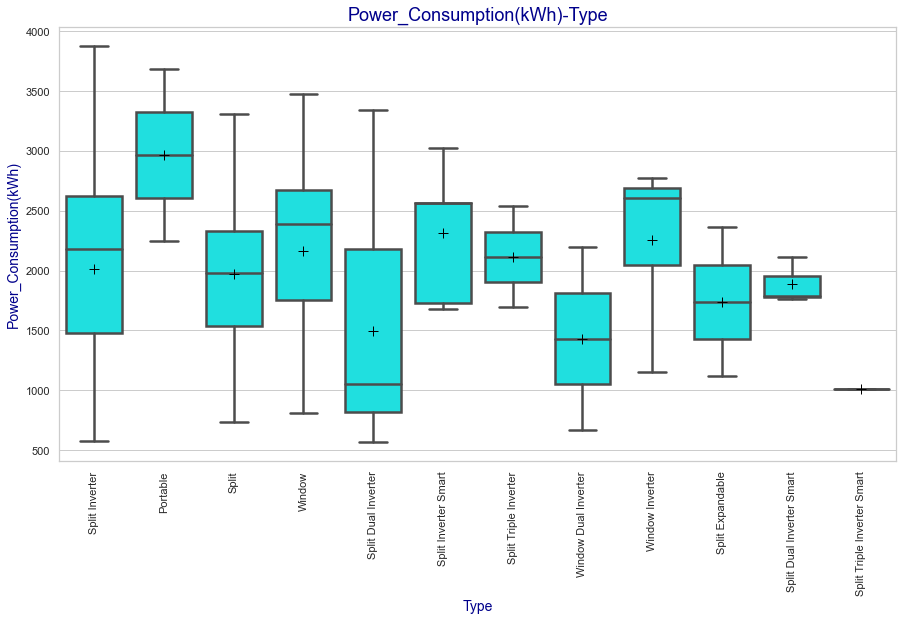

In [51]:
plt.figure(figsize=(15,8))
sns.boxplot(y=DF['Power_Consumption(kWh)'],color='cyan',x=DF['Type'],showmeans=True,meanprops={"marker": "+","markeredgecolor": "black",
                       "markersize": "10"},linewidth=2.5);
plt.ylabel('Power_Consumption(kWh)',fontsize=14,color='darkblue');
plt.xlabel('Type',fontsize=14,color='darkblue');
plt.title('Power_Consumption(kWh)-Type',fontsize=18,color='darkblue');
plt.xticks(rotation=90);

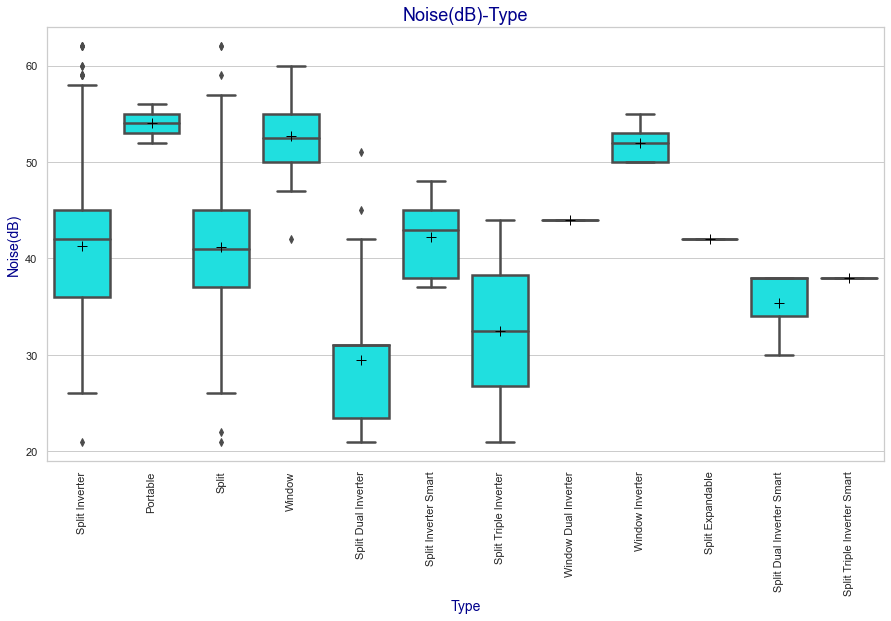

In [52]:
plt.figure(figsize=(15,8))
sns.boxplot(y=DF['Noise(dB)'],color='cyan',x=DF['Type'],showmeans=True,meanprops={"marker": "+","markeredgecolor": "black",
                       "markersize": "10"},linewidth=2.5);
plt.ylabel('Noise(dB)',fontsize=14,color='darkblue');
plt.xlabel('Type',fontsize=14,color='darkblue');
plt.title('Noise(dB)-Type',fontsize=18,color='darkblue');
plt.xticks(rotation=90);

In [53]:
DF['Power_Consumption(kWh)'].describe().round()

count     508.0
mean     1984.0
std       724.0
min       572.0
25%      1472.0
50%      2120.0
75%      2602.0
max      3872.0
Name: Power_Consumption(kWh), dtype: float64

C:\Users\Bharath Kumar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Bharath Kumar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


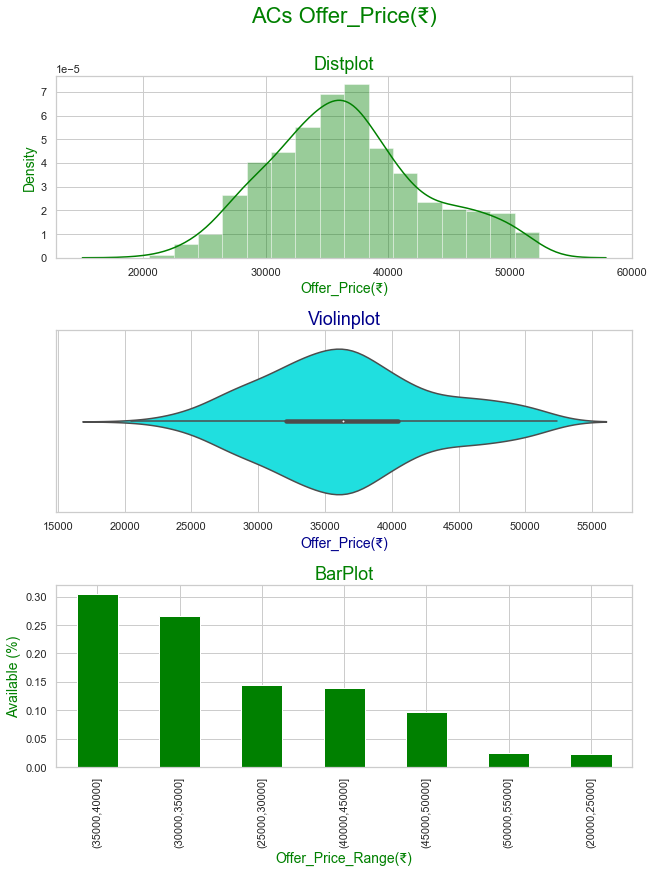

In [54]:
plt.figure(figsize=(10,12))
sns.set(style='whitegrid')
plt.subplot(3,1,1)
sns.distplot(DF['Offer_Price(₹)'],color='green')
plt.xlabel('Offer_Price(₹)',fontsize=14,color='green')
plt.ylabel('Density',fontsize=14,color='green')
plt.title('Distplot',fontsize=18,color='green')
plt.suptitle('ACs Offer_Price(₹)',fontsize=22,color='green')

plt.subplot(3,1,2)
sns.violinplot(DF['Offer_Price(₹)'],color='cyan',showmeans=True,meanprops={"marker": "+","markeredgecolor": "black",
                       "markersize": "10"})
plt.xlabel('Offer_Price(₹)',fontsize=14,color='darkblue')
plt.title('Violinplot',fontsize=18,color='darkblue')

plt.subplot(3,1,3)
DF['Offer_Price_Range(₹)'].value_counts(normalize=True).plot(kind='bar',color=['green'])
plt.xlabel('Offer_Price_Range(₹)',fontsize=14,color='green')
plt.ylabel('Available (%)',fontsize=14,color='green')
plt.title('BarPlot',fontsize=18,color='green')
# set the spacing between subplots
plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4,hspace=0.4)

In [55]:
DF['Offer_Price(₹)'].describe().round()

count      508.0
mean     36706.0
std       6355.0
min      20490.0
25%      32100.0
50%      36349.0
75%      40499.0
max      52382.0
Name: Offer_Price(₹), dtype: float64

Text(0.5, 1.0, 'Available AC qnty for each Ton and Star')

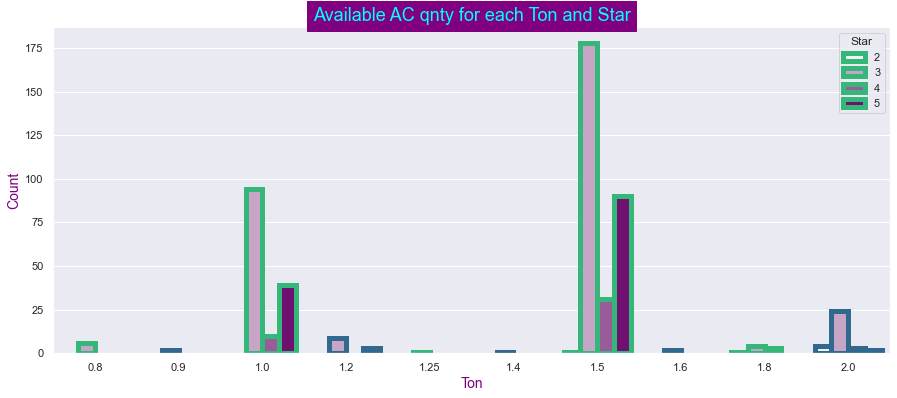

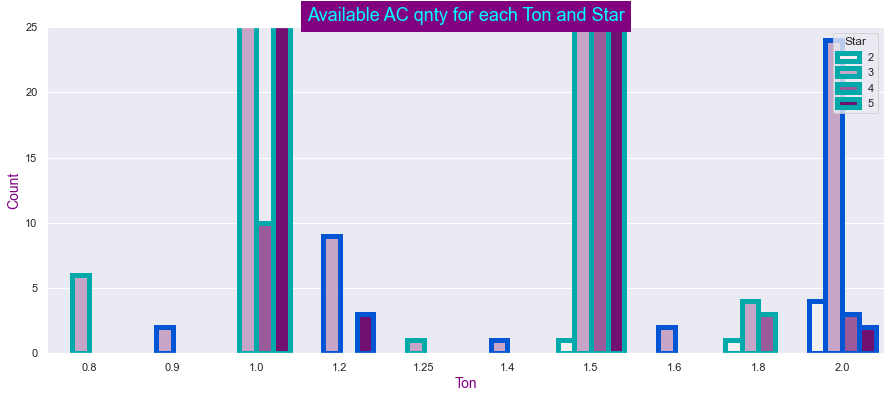

In [56]:
plt.figure(figsize=(15,6))
sns.set(style='darkgrid')
sns.countplot(x = 'Ton',hue = 'Star',data = DF,color="purple",linewidth=5,
                   edgecolor=sns.color_palette("viridis_r", 2))
plt.xlabel('Ton',color='purple',fontsize=14)
plt.ylabel('Count',color='purple',fontsize=14)
plt.title('Available AC qnty for each Ton and Star',color='cyan',backgroundcolor='purple',fontsize=18)
plt.figure(figsize=(15,6))
sns.countplot(x = 'Ton',hue = 'Star',data = DF,color="purple",linewidth=5,
                   edgecolor=sns.color_palette("winter_r", 2))
plt.ylim([0,25])
plt.xlabel('Ton',color='purple',fontsize=14)
plt.ylabel('Count',color='purple',fontsize=14)
plt.title('Available AC qnty for each Ton and Star',color='cyan',backgroundcolor='purple',fontsize=18)

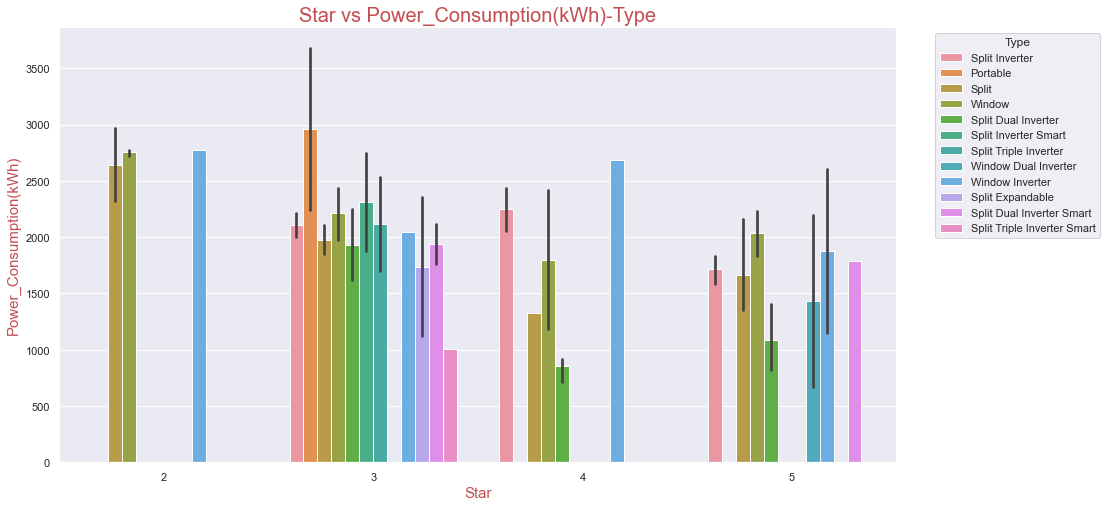

In [57]:
plt.figure(figsize=(15,8))
sns.barplot(x='Star',y='Power_Consumption(kWh)',estimator=np.mean,hue='Type',data=DF)
plt.xlabel('Star',fontsize=15,color='r')
plt.ylabel('Power_Consumption(kWh)',fontsize=15,color='r')
plt.title('Star vs Power_Consumption(kWh)-Type',fontsize=20,color='r')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left",title='Type')
#tonnage factor need to include

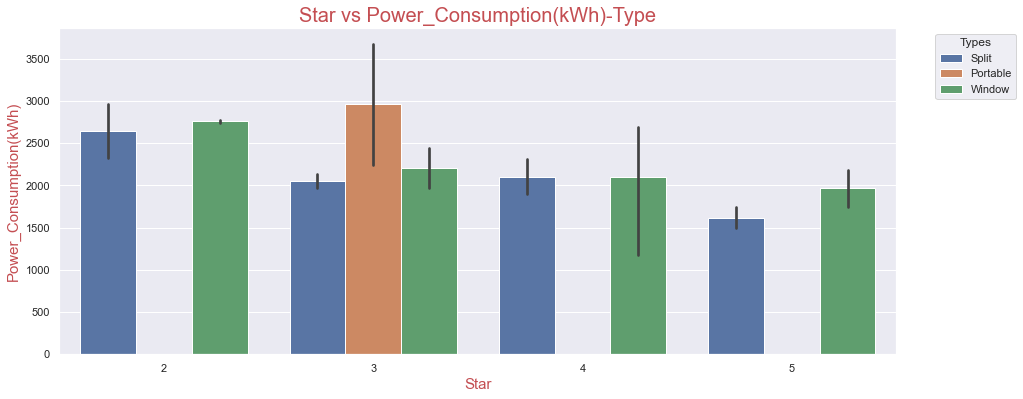

In [58]:
plt.figure(figsize=(15,6))
sns.barplot(x='Star',y='Power_Consumption(kWh)',estimator=np.mean,hue='Types',data=DF)
plt.xlabel('Star',fontsize=15,color='r')
plt.ylabel('Power_Consumption(kWh)',fontsize=15,color='r')
plt.title('Star vs Power_Consumption(kWh)-Type',fontsize=20,color='r')
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left",title='Types')
#tonnage factor need to include

<AxesSubplot:xlabel='Star', ylabel='Offer_Price(₹)'>

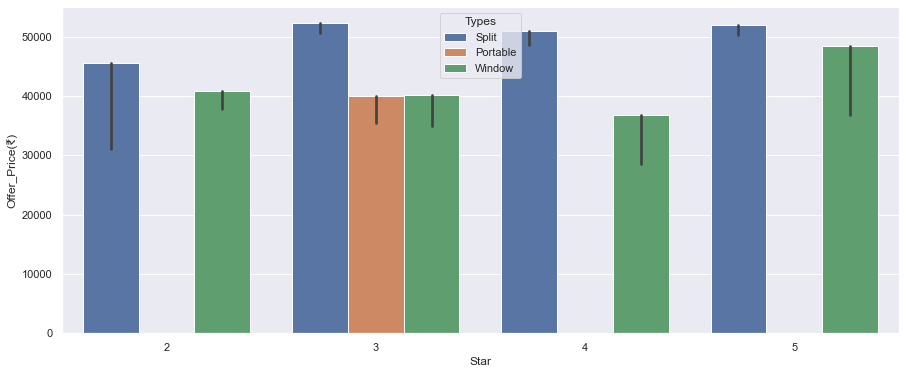

In [59]:
plt.figure(figsize=(15,6))
sns.barplot(x='Star',y='Offer_Price(₹)',estimator=max,hue='Types',data=DF)
#tonnage factor need to include

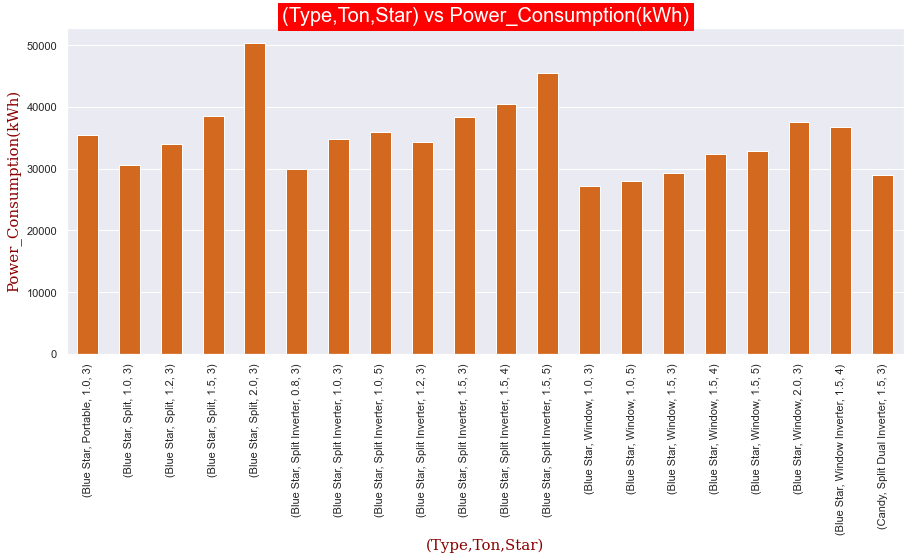

In [60]:
plt.figure(figsize=(15,6))
DF.groupby(['Brands','Type','Ton','Star'])['Offer_Price(₹)'].mean()[:20].plot.bar(color='chocolate');
font1 = {'family':'serif','color':'darkred','size':15}
plt.ylabel('Power_Consumption(kWh)',fontdict = font1)
plt.xlabel('(Type,Ton,Star)',fontdict = font1)
plt.xticks(rotation=90)
plt.title(label="(Type,Ton,Star) vs Power_Consumption(kWh)",fontsize=20,color='w',backgroundcolor='red')
plt.grid(axis = 'x',color = 'darkblue', linestyle = '--', linewidth = 1.0)
plt.show();

<ipython-input-31-0b8b3bcdea71>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();
<ipython-input-31-0b8b3bcdea71>:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();


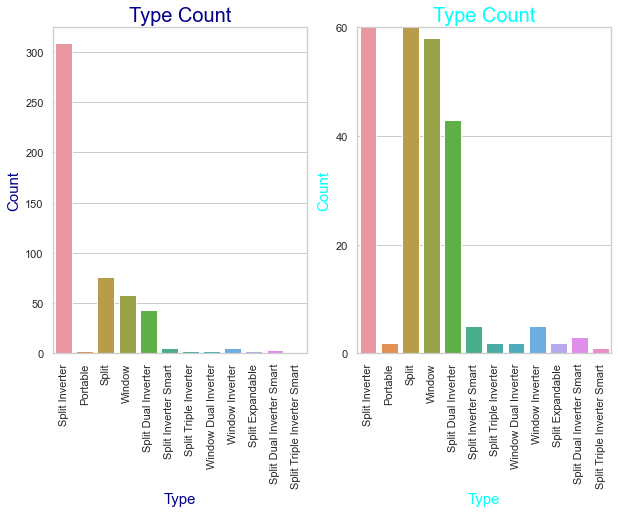

In [31]:
# matplotlib.pyplot.subplots(nrows=1, ncols=1, sharex=False, sharey=False, squeeze=True, subplot_kw=None, gridspec_kw=None, **fig_kw)
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,6),sharex=True)
plt.xticks.labelsize:40
plt.yticks.labelsize:40  
sns.set(style='whitegrid')
sns.countplot(x=DF['Type'],ax=ax1)
plt.title('Type Count')   
plt.yticks([x for x in range(0,400,20)])
ax1.tick_params(axis='x', rotation=90)
ax1.set_xlabel('Type',color='darkblue',fontsize=15)
ax1.set_ylabel('Count',color='darkblue',fontsize=15)
ax1.set_title('Type Count',color='darkblue',fontsize=20)
fig.show(); 
sns.countplot(x=DF['Type'],ax=ax2) 
plt.title('Type Count')   
plt.yticks([x for x in range(0,90,20)])
ax2.tick_params(axis='x', rotation=90)
plt.ylim([0,60])
ax2.set_xlabel('Type',color='cyan',fontsize=15)
ax2.set_ylabel('Count',color='cyan',fontsize=15)
ax2.set_title('Type Count',color='cyan',fontsize=20)
fig.show();

In [62]:
DF.nlargest(5,'Offer_Price(₹)',keep='first')

,Brands,Ton,Star,Type,Color,Condenser_Coil,Noise(dB),Power_Consumption(kWh),Power_Range(kWh),Refrigerant,...,Reviews_Count,Avg_star,Avg_star_Range,Offer_Price(₹),Offer_Price_Range(₹),Actual_Price(₹),Act_Price_Range(₹),Discount(%),Merged,Types
420,Daikin,1.8,3,Split Inverter,White,Copper,56.0,3200.0,"(3000,3500]",R32,...,4.0,4.0,"(3.5,4.0]",52382.0,"(50000,55000]",66000.0,"(65000,70000]",21.0,Daikin 1.8 Ton 3.0 Star,Split
73,Carrier,2.0,5,Split Inverter,White,Copper,38.0,2848.0,"(2500,3000]",R32,...,795.0,4.3,"(4.0,4.5]",51999.0,"(50000,55000]",74990.0,"(70000,75000]",31.0,Carrier 2.0 Ton 5.0 Star,Split
188,Panasonic,1.5,5,Split Inverter,White,Copper,47.0,2304.0,"(2000,2500]",R32,...,25.0,4.3,"(4.0,4.5]",51850.0,"(50000,55000]",69900.0,"(65000,70000]",26.0,Panasonic 1.5 Ton 5.0 Star,Split
309,Hitachi,2.0,3,Split Inverter,White,Copper,59.0,3872.0,"(3500,4000]",R32A,...,0.0,0.0,"(-0.5,0.0]",51399.0,"(50000,55000]",68500.0,"(65000,70000]",25.0,Hitachi 2.0 Ton 3.0 Star,Split
254,Lg,1.5,5,Split Dual Inverter,White,Copper,31.0,819.0,"(500,1000]",R32A,...,0.0,3.5,"(3.0,3.5]",50990.0,"(50000,55000]",79990.0,"(75000,80000]",36.0,Lg 1.5 Ton 5.0 Star,Split


In [63]:
pd.crosstab([DF['Brands'],DF['Offer_Price_Range(₹)']],[DF['Star'],DF['Ton']]).to_dict()

{(2, 1.5): {('Blue Star', '(25000,30000]'): 0,
  ('Blue Star', '(30000,35000]'): 0,
  ('Blue Star', '(35000,40000]'): 0,
  ('Blue Star', '(40000,45000]'): 0,
  ('Blue Star', '(45000,50000]'): 0,
  ('Blue Star', '(50000,55000]'): 0,
  ('Candy', '(25000,30000]'): 0,
  ('Carrier', '(20000,25000]'): 0,
  ('Carrier', '(25000,30000]'): 0,
  ('Carrier', '(30000,35000]'): 0,
  ('Carrier', '(35000,40000]'): 0,
  ('Carrier', '(40000,45000]'): 0,
  ('Carrier', '(50000,55000]'): 0,
  ('Croma', '(20000,25000]'): 0,
  ('Croma', '(25000,30000]'): 0,
  ('Croma', '(30000,35000]'): 0,
  ('Croma', '(35000,40000]'): 0,
  ('Croma', '(40000,45000]'): 0,
  ('Croma', '(45000,50000]'): 0,
  ('Daikin', '(25000,30000]'): 0,
  ('Daikin', '(30000,35000]'): 0,
  ('Daikin', '(35000,40000]'): 0,
  ('Daikin', '(40000,45000]'): 0,
  ('Daikin', '(45000,50000]'): 0,
  ('Daikin', '(50000,55000]'): 0,
  ('Gazhal', '(30000,35000]'): 0,
  ('Gazhal', '(35000,40000]'): 0,
  ('Godrej', '(25000,30000]'): 0,
  ('Godrej', '(30000,

In [64]:
sns.set(style='whitegrid')
plt.figure(figsize=(12,8))
DF.groupby(['Brands','Ton','Star','Type'])['Actual_Price(₹)'].agg(['min','mean','max']).round().to_csv('group.csv')

<Figure size 864x576 with 0 Axes>

In [65]:
DF.columns

Index(['Brands', 'Ton', 'Star', 'Type', 'Color', 'Condenser_Coil', 'Noise(dB)',
       'Power_Consumption(kWh)', 'Power_Range(kWh)', 'Refrigerant',
       'Wi_Fi Enabled', 'Product_Warranty(Years)', 'PCB_Warranty(Years)',
       'Compressor_Warranty(Years)', 'Condenser_Warranty(Years)',
       'ODU_Casing_Warranty(Years)', 'Ratings_Count', 'Reviews_Count',
       'Avg_star', 'Avg_star_Range', 'Offer_Price(₹)', 'Offer_Price_Range(₹)',
       'Actual_Price(₹)', 'Act_Price_Range(₹)', 'Discount(%)', 'Merged',
       'Types'],
      dtype='object')

In [66]:
DF2=DF[['Ton', 'Star', 'Noise(dB)','Power_Consumption(kWh)', 'Product_Warranty(Years)', 'PCB_Warranty(Years)',
       'Compressor_Warranty(Years)', 'Condenser_Warranty(Years)', 'ODU_Casing_Warranty(Years)',
       'Avg_star', 'Offer_Price(₹)','Actual_Price(₹)', 'Discount(%)']]

<AxesSubplot:>

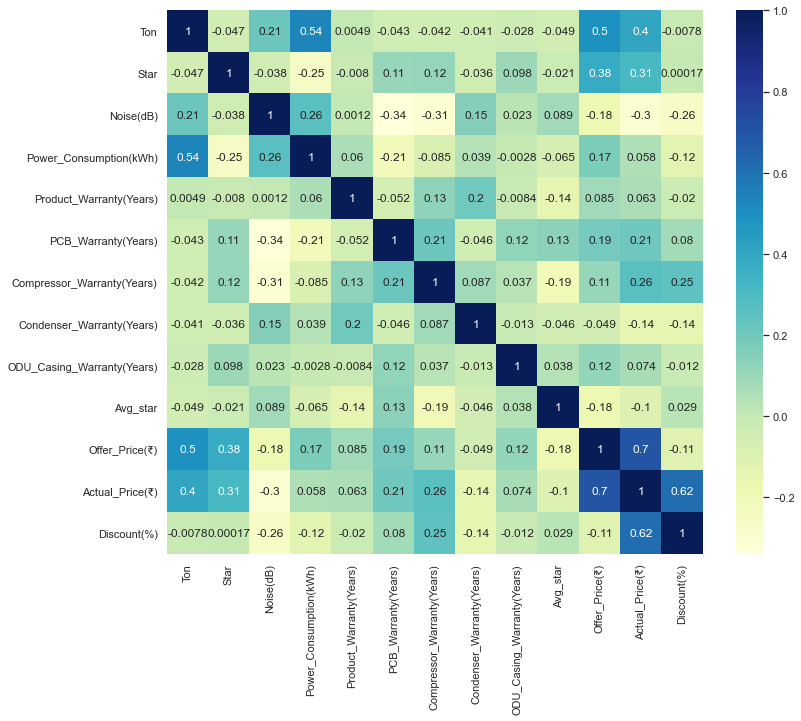

In [67]:
plt.figure(figsize=(12,10))
sns.heatmap(DF2.corr(),cmap="YlGnBu", annot=True)

In [68]:
DF3=DF.groupby('Type')['Offer_Price(₹)'].quantile([0,0.25,0.5,0.75,1]).round().to_frame()

In [69]:
DF3.reset_index(inplace=True)
DF3.rename({'level_1':'Quantiles'},axis=1,inplace=True)
DF3.pivot(index='Quantiles',columns='Type',values='Offer_Price(₹)').to_excel('E:\KIRAN\INNOMATICS\AC Type Quantiles.xlsx')

In [70]:
DF.groupby('Type')['Offer_Price(₹)'].mean().round()

Type
Portable                       37740.0
Split                          34934.0
Split Dual Inverter            39772.0
Split Dual Inverter Smart      36160.0
Split Expandable               34000.0
Split Inverter                 37910.0
Split Inverter Smart           35992.0
Split Triple Inverter          30740.0
Split Triple Inverter Smart    31990.0
Window                         30768.0
Window Dual Inverter           40240.0
Window Inverter                35372.0
Name: Offer_Price(₹), dtype: float64

In [72]:
DF4=DF.groupby('Type')['Power_Consumption(kWh)'].quantile([0,0.25,0.5,0.75,1]).round().to_frame()

In [73]:
DF4.reset_index(inplace=True)
DF4.rename({'level_1':'Quantiles'},axis=1,inplace=True)
DF4.pivot(index='Quantiles',columns='Type',values='Power_Consumption(kWh)').to_excel('E:\KIRAN\INNOMATICS\AC Type Power Quantiles.xlsx')

In [74]:
DF.groupby('Type')['Power_Consumption(kWh)'].mean().round()

Type
Portable                       2962.0
Split                          1972.0
Split Dual Inverter            1500.0
Split Dual Inverter Smart      1889.0
Split Expandable               1740.0
Split Inverter                 2013.0
Split Inverter Smart           2310.0
Split Triple Inverter          2116.0
Split Triple Inverter Smart    1009.0
Window                         2167.0
Window Dual Inverter           1432.0
Window Inverter                2253.0
Name: Power_Consumption(kWh), dtype: float64

In [75]:
DF['Power_Consumption(kWh)'].quantile([0,0.25,0.5,0.75,1]).round()

0.00     572.0
0.25    1472.0
0.50    2120.0
0.75    2602.0
1.00    3872.0
Name: Power_Consumption(kWh), dtype: float64

In [76]:
DF5=DF.groupby('Type')['Noise(dB)'].quantile([0,0.25,0.5,0.75,1]).round().to_frame()

In [77]:
DF5.reset_index(inplace=True)
DF5.rename({'level_1':'Quantiles'},axis=1,inplace=True)
DF5.pivot(index='Quantiles',columns='Type',values='Noise(dB)').to_excel('E:\KIRAN\INNOMATICS\AC Type Noise Quantiles.xlsx')

In [78]:
DF.groupby('Type')['Noise(dB)'].mean().round()

Type
Portable                       54.0
Split                          41.0
Split Dual Inverter            29.0
Split Dual Inverter Smart      35.0
Split Expandable               42.0
Split Inverter                 41.0
Split Inverter Smart           42.0
Split Triple Inverter          32.0
Split Triple Inverter Smart    38.0
Window                         53.0
Window Dual Inverter           44.0
Window Inverter                52.0
Name: Noise(dB), dtype: float64

In [71]:
DF.columns

Index(['Brands', 'Ton', 'Star', 'Type', 'Color', 'Condenser_Coil', 'Noise(dB)',
       'Power_Consumption(kWh)', 'Power_Range(kWh)', 'Refrigerant',
       'Wi_Fi Enabled', 'Product_Warranty(Years)', 'PCB_Warranty(Years)',
       'Compressor_Warranty(Years)', 'Condenser_Warranty(Years)',
       'ODU_Casing_Warranty(Years)', 'Ratings_Count', 'Reviews_Count',
       'Avg_star', 'Avg_star_Range', 'Offer_Price(₹)', 'Offer_Price_Range(₹)',
       'Actual_Price(₹)', 'Act_Price_Range(₹)', 'Discount(%)', 'Merged',
       'Types'],
      dtype='object')

In [33]:
DF6=DF.groupby(['Brands', 'Ton', 'Star', 'Type','Condenser_Coil','Refrigerant','Power_Consumption(kWh)','Power_Range(kWh)','Offer_Price_Range(₹)'])['Offer_Price(₹)'].median().round().to_frame()

In [34]:
DF6.reset_index(inplace=True)

In [35]:
DF6

,Brands,Ton,Star,Type,Condenser_Coil,Refrigerant,Power_Consumption(kWh),Power_Range(kWh),Offer_Price_Range(₹),Offer_Price(₹)
0,Blue Star,0.8,3,Split Inverter,Copper,R32A,835.0,"(500,1000]","(25000,30000]",29990.0
1,Blue Star,1.0,3,Portable,Copper,R410A,2245.0,"(2000,2500]","(35000,40000]",35490.0
2,Blue Star,1.0,3,Split,Copper,R32A,1183.0,"(1000,1500]","(30000,35000]",32500.0
3,Blue Star,1.0,3,Split,Copper,R33,1528.0,"(1500,2000]","(25000,30000]",28499.0
4,Blue Star,1.0,3,Split Inverter,Copper,R32A,704.0,"(500,1000]","(30000,35000]",33990.0
...,...,...,...,...,...,...,...,...,...,...
462,Whirlpool,1.5,3,Split Inverter Smart,Copper,R32A,3024.0,"(3000,3500]","(30000,35000]",33990.0
463,Whirlpool,1.5,5,Split Inverter,Copper,R32,2120.0,"(2000,2500]","(35000,40000]",36590.0
464,Whirlpool,1.5,5,Split Inverter,Copper,R32,2184.0,"(2000,2500]","(35000,40000]",39990.0
465,Whirlpool,1.5,5,Split Inverter,Copper,R32A,1472.0,"(1000,1500]","(35000,40000]",36580.0


In [36]:
DF6=DF6.sort_values(['Ton','Star','Power_Consumption(kWh)','Offer_Price(₹)'])

In [37]:
DF6.reset_index(inplace=True,drop=True)

In [38]:
DF6

,Brands,Ton,Star,Type,Condenser_Coil,Refrigerant,Power_Consumption(kWh),Power_Range(kWh),Offer_Price_Range(₹),Offer_Price(₹)
0,Marq,0.8,3,Split Inverter,Copper,R32A,579.0,"(500,1000]","(20000,25000]",24499.0
1,Lloyd,0.8,3,Split Inverter,Copper,R32A,585.0,"(500,1000]","(30000,35000]",30999.0
2,Blue Star,0.8,3,Split Inverter,Copper,R32A,835.0,"(500,1000]","(25000,30000]",29990.0
3,Marq,0.8,3,Split Inverter,Copper,R32,1096.0,"(1000,1500]","(20000,25000]",20490.0
4,Daikin,0.8,3,Split,Copper,R32A,1134.0,"(1000,1500]","(25000,30000]",26999.0
...,...,...,...,...,...,...,...,...,...,...
462,Hitachi,2.0,3,Split Inverter,Copper,R32A,3872.0,"(3500,4000]","(50000,55000]",51399.0
463,Samsung,2.0,4,Split Inverter,Copper,R32A,2912.0,"(2500,3000]","(45000,50000]",46994.0
464,Samsung,2.0,4,Split Inverter,Copper,R32,2912.0,"(2500,3000]","(45000,50000]",48690.0
465,Lg,2.0,5,Window Dual Inverter,Copper,R32,2193.0,"(2000,2500]","(45000,50000]",48490.0


In [39]:
# DF6.to_excel('E:\KIRAN\INNOMATICS\AC sorted Ton.xlsx')

In [40]:
# DF6.to_csv('AC sorted Ton.csv')

In [41]:
# plt.figure(figsize=(15,6))
pd.crosstab(DF6['Offer_Price_Range(₹)'],DF6['Power_Range(kWh)'])#.plot(kind='bar',figsize=(15,8))

Power_Range(kWh),"(1000,1500]","(1500,2000]","(2000,2500]","(2500,3000]","(3000,3500]","(3500,4000]","(500,1000]"
Offer_Price_Range(₹),,,,,,,
"(20000,25000]",4,4,1,1,0,0,2
"(25000,30000]",13,24,12,13,1,0,8
"(30000,35000]",17,31,30,27,3,0,17
"(35000,40000]",17,33,32,40,2,1,13
"(40000,45000]",7,8,19,15,6,0,9
"(45000,50000]",10,3,12,7,6,1,5
"(50000,55000]",1,1,3,1,5,1,1


In [194]:
DF7=DF6[DF6['Type'].isin(['Split Inverter', 'Split', 'Split Dual Inverter', 'Window'])]
DF7.to_excel('E:\KIRAN\INNOMATICS\DF7.xlsx')